In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager


In [3]:
df_shot=pd.read_csv('shots_data/shots_openplay_foot.csv')
df_shot=df_shot[df_shot['distance']>20]
df_shot=df_shot[df_shot['1on1']==0]
df_shot

C:\Users\ADAM\AppData\Local\Temp\ipykernel_18848\2462410310.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_shot=pd.read_csv('shots_openplay_foot.csv')


,competition_id,season_id,match_id,location,shot_outcome,shot_statsbomb_xg,under_pressure,shot_type,shot_body_part,shot_one_on_one,...,x_gk,y_gk,angle,distance,goal,1on1,underPressure,DistanceShooterGk,DistanceGk,minus
0,9,281,3895302,"[89.2, 42.5]",Blocked,0.021272,True,Open Play,Left Foot,NaN,...,116.9,40.1,14.704957,30.800000,0,0,1,27.803777,3.1,-27.7
1,9,281,3895302,"[97.5, 40.8]",Saved,0.048408,True,Open Play,Left Foot,NaN,...,117.8,40.4,20.137024,22.500000,0,0,1,20.303941,2.2,-20.3
2,9,281,3895302,"[93.8, 34.8]",Off T,0.024202,True,Open Play,Right Foot,NaN,...,118.6,39.9,16.726070,26.227467,0,0,1,25.318965,1.4,-24.8
3,9,281,3895302,"[93.0, 39.1]",Goal,0.031473,NaN,Open Play,Left Foot,NaN,...,118.6,39.9,16.835896,27.000000,1,0,0,25.612497,1.4,-25.6
4,9,281,3895302,"[93.5, 40.1]",Goal,0.042012,NaN,Open Play,Right Foot,NaN,...,116.7,39.9,17.167008,26.500000,1,0,0,23.200862,3.3,-23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29768,72,30,69161,"[100.3, 52.5]",Blocked,0.021892,NaN,Open Play,Right Foot,NaN,...,118.4,43.2,16.609461,21.455535,0,0,0,20.349447,1.6,-18.1
29769,72,30,69161,"[96.3, 36.2]",Off T,0.038350,NaN,Open Play,Left Foot,NaN,...,119.1,38.6,18.700592,23.700000,0,0,0,22.925968,0.9,-22.8
29770,72,30,69161,"[98.5, 24.3]",Off T,0.025679,NaN,Open Play,Right Foot,NaN,...,119.1,38.2,13.943962,24.477336,0,0,0,24.850956,0.9,-20.6
29771,72,30,69161,"[102.9, 54.6]",Off T,0.037896,True,Open Play,Right Foot,NaN,...,119.0,42.5,15.611898,20.118897,0,0,1,20.140010,1.0,-16.1


In [4]:
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
df_no_goals=df_shot[df_shot['shot_outcome']!='Goal'].copy()

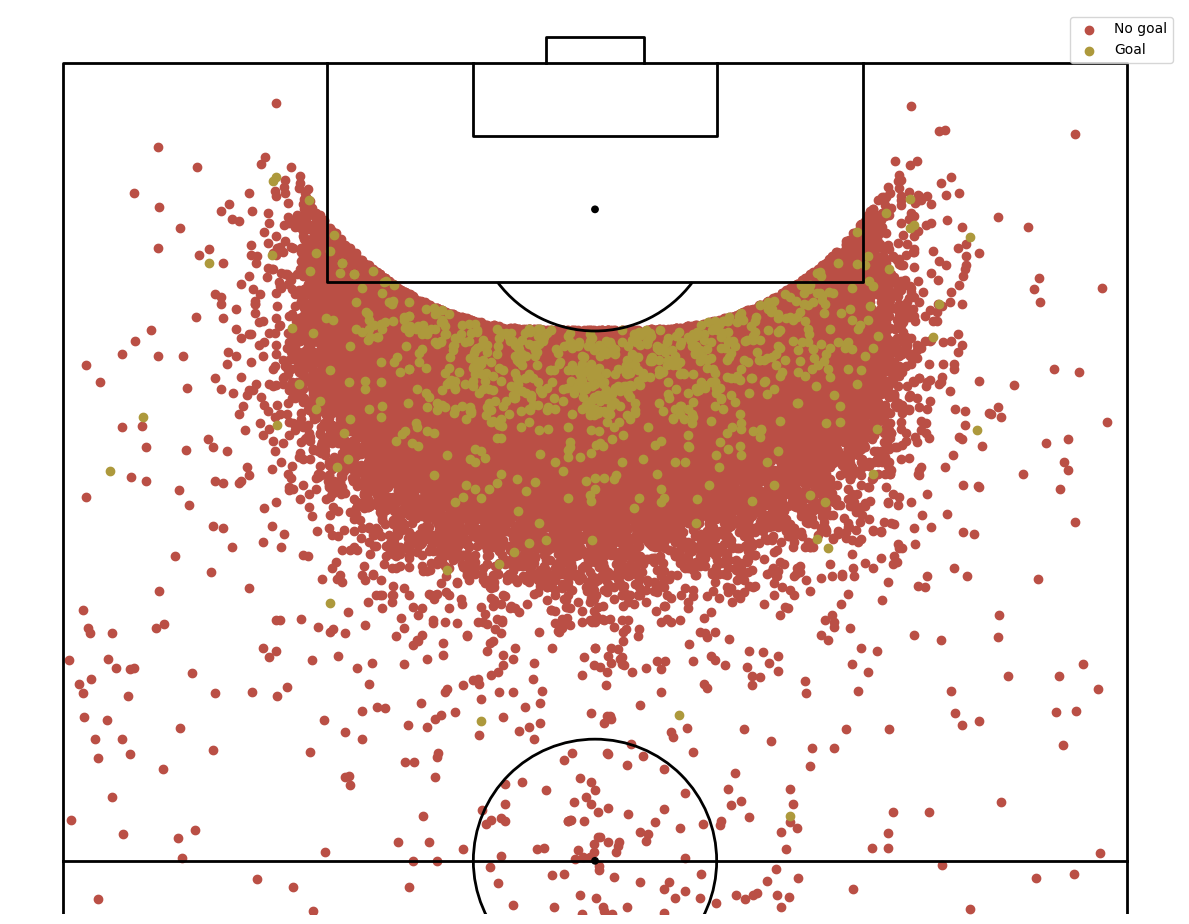

In [5]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

no_goals=pitch.scatter(
    df_no_goals['x'],df_no_goals['y'],
    c='#ba4f45', 
    marker='o',  
    ax=ax, label="No goal"
)
goals = pitch.scatter(
    df_goals['x'], df_goals['y'],
    c='#ad993c', 
    marker='o',  
    ax=ax, label="Goal" 
)

plt.legend(loc='best')
plt.show()

c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


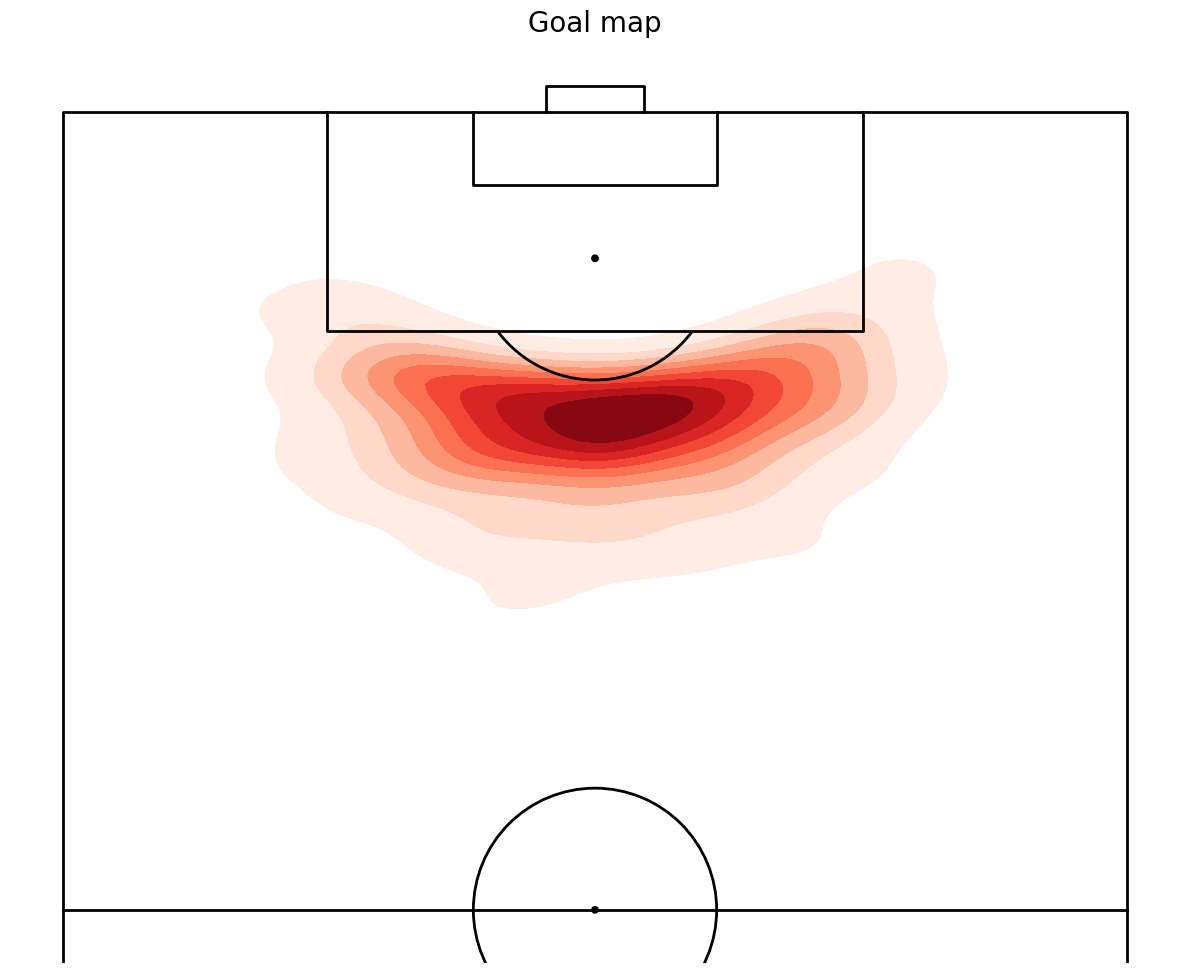

In [6]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(
    x=df_goals['x'],
    y=df_goals['y'],
    ax=ax,
    cmap='Reds',      
    shade=True      
)

fig.suptitle('Goal map' , fontsize = 20)
plt.show()


c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


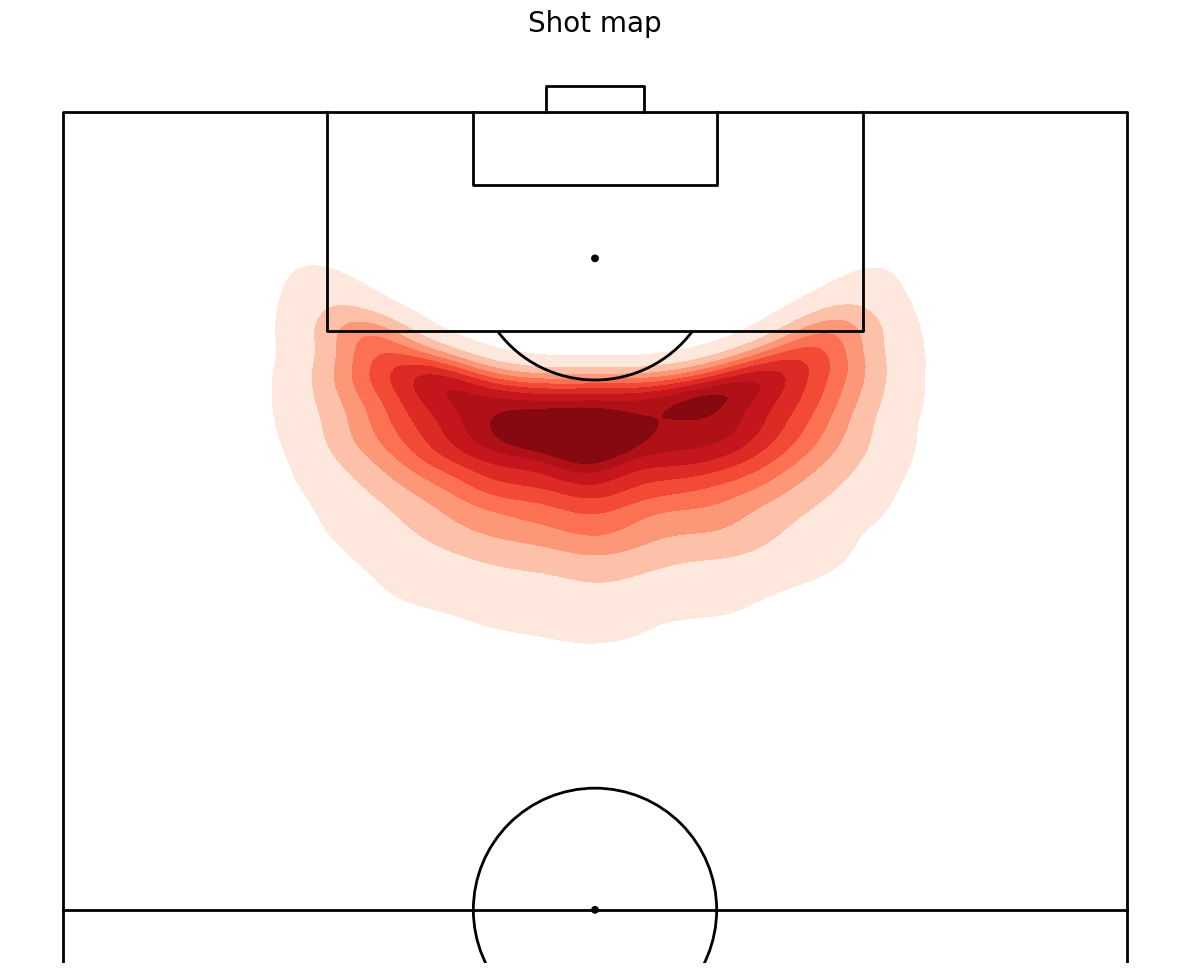

In [7]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(df_shot['x'],df_shot['y'],ax=ax,cmap='Reds',shade=True)
fig.suptitle('Shot map' , fontsize = 20)
plt.show()

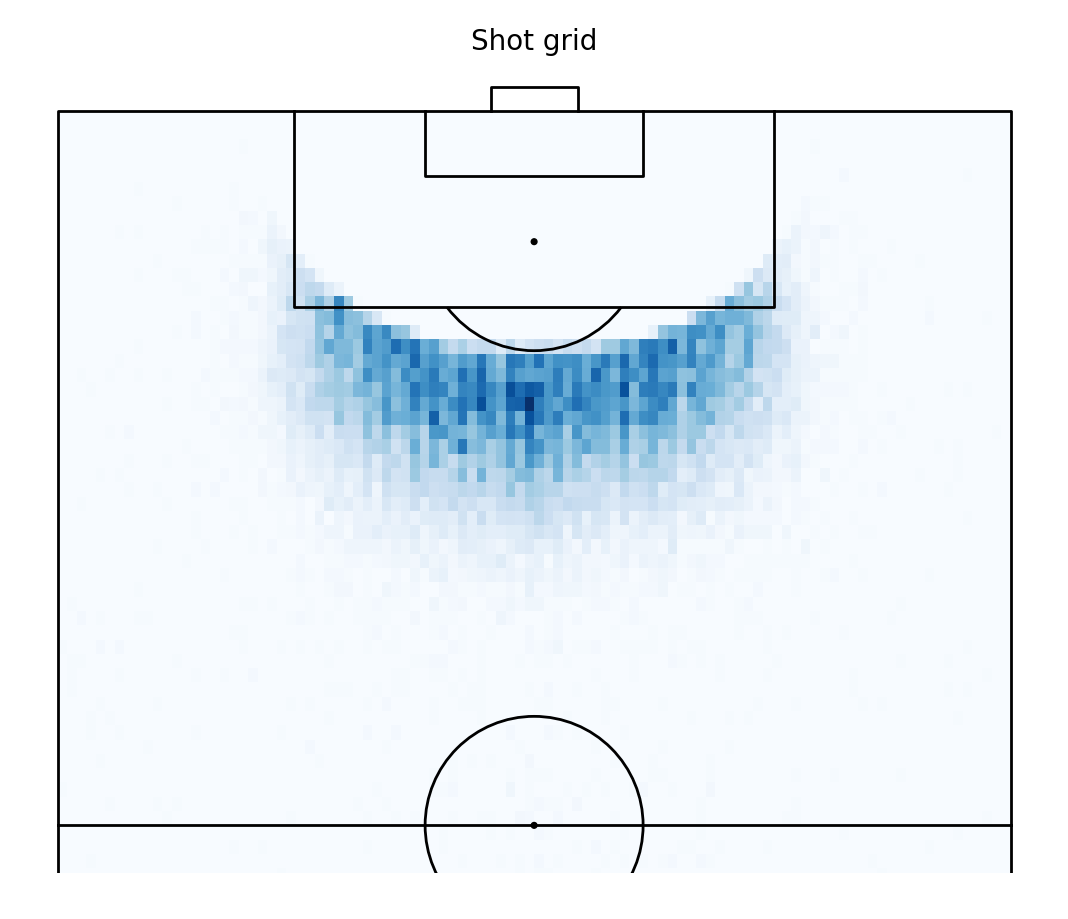

In [8]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_shots = pitch.bin_statistic(df_shot["x"], df_shot["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Shot grid' , fontsize = 20)
plt.show()


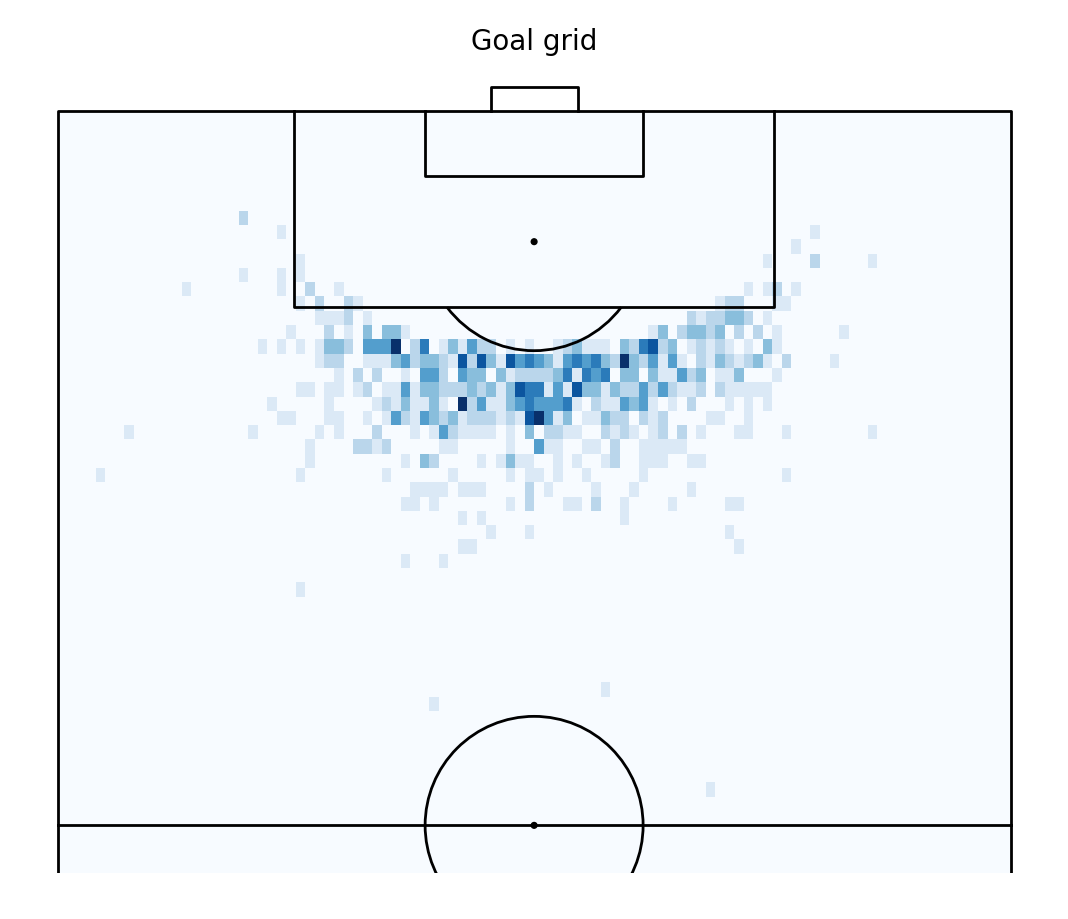

In [9]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_goals = pitch.bin_statistic(df_goals["x"], df_goals["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Goal grid' , fontsize = 20)
plt.show()


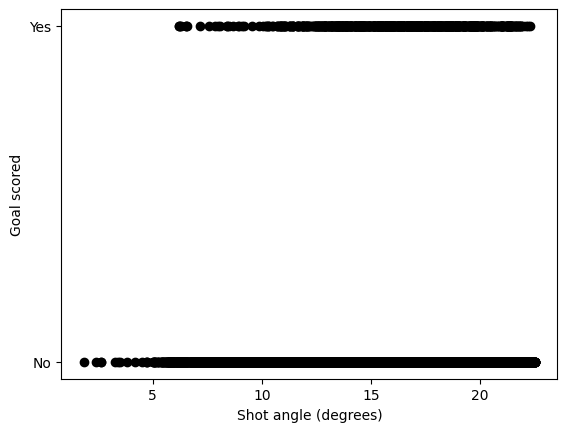

In [10]:
fig, ax = plt.subplots()
ax.plot(df_shot['angle'], df_shot['goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

C:\Users\ADAM\AppData\Local\Temp\ipykernel_18848\1192084455.py:3: RuntimeWarning: invalid value encountered in divide
  prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])


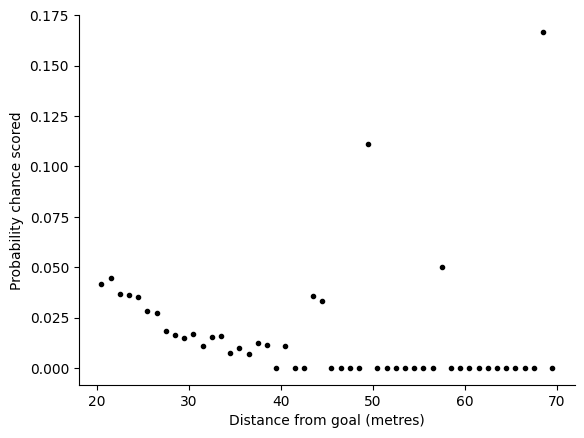

In [11]:
shotcount_dist = np.histogram(df_shot['distance'],bins=70,range=[0, 70])
goalcount_dist = np.histogram(df_goals['distance'],bins=70,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

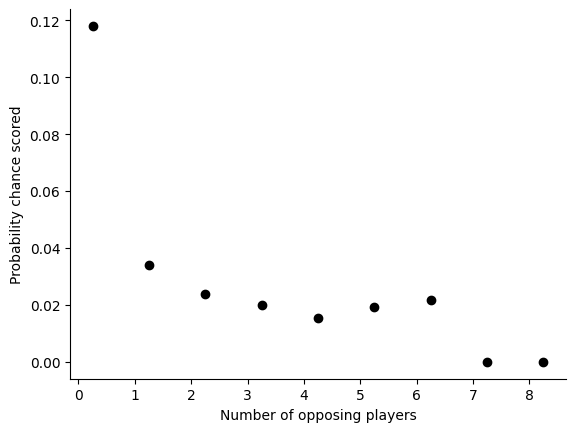

In [12]:
shotcount_nbr = np.histogram(df_shot['num_opposing_players'], bins=20, range=[0, 10])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_nbr = np.histogram(df_goals['num_opposing_players'], bins=20, range=[0, 10])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_nbr[0], shotcount_nbr[0])
num_opposing_players = shotcount_nbr[1]
midnum_opposing_players = (num_opposing_players[:-1] + num_opposing_players[1:])/2
fig,ax = plt.subplots()
ax.plot(midnum_opposing_players, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Number of opposing players")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

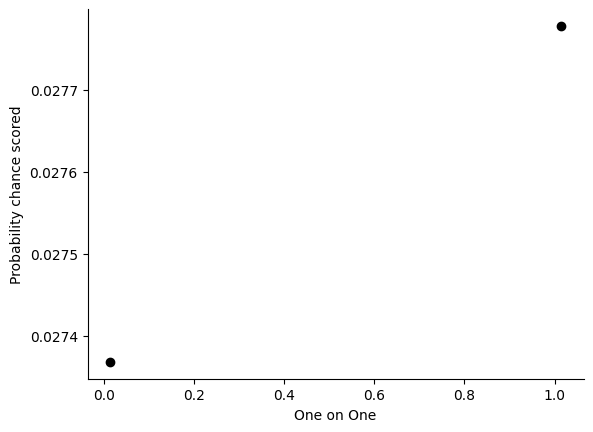

In [13]:
shotcount_underPressure = np.histogram(df_shot['underPressure'], bins=70, range=[0, 2])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_underPressure = np.histogram(df_goals['underPressure'], bins=70, range=[0, 2])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_underPressure[0], shotcount_underPressure[0])
underPressure = shotcount_underPressure[1]
midunderPressure = (underPressure[:-1] + underPressure[1:])/2
fig,ax = plt.subplots()
ax.plot(midunderPressure, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("One on One")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

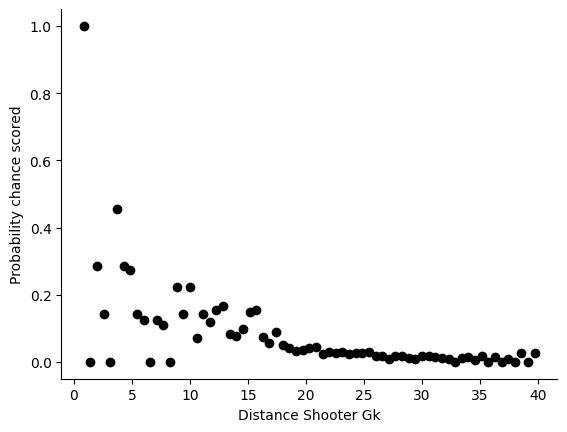

In [14]:
shotcount_DistanceShooterGk = np.histogram(df_shot['DistanceShooterGk'], bins=70, range=[0, 40])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_DistanceShooterGk = np.histogram(df_goals['DistanceShooterGk'], bins=70, range=[0, 40])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_DistanceShooterGk[0], shotcount_DistanceShooterGk[0])
DistanceShooterGk = shotcount_DistanceShooterGk[1]
midDistanceShooterGk = (DistanceShooterGk[:-1] + DistanceShooterGk[1:])/2
fig,ax = plt.subplots()
ax.plot(midDistanceShooterGk, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance Shooter Gk")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [15]:
x = df_shot[['angle','y','DistanceShooterGk','distance','minus']]
x.fillna(0, inplace=True)
y = df_shot['goal']

import xgboost as xgb
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.01,             
    'max_depth': 4,            
    'subsample': 0.9,        
    'colsample_bytree': 0.8
}

evals = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(params, dtrain, num_boost_round=2500, evals=evals, early_stopping_rounds=250)

y_pred_prob = bst.predict(dtest)

C:\Users\ADAM\AppData\Local\Temp\ipykernel_18848\3268244654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


[0]	train-logloss:0.19209	test-logloss:0.18756
[1]	train-logloss:0.19112	test-logloss:0.18660
[2]	train-logloss:0.19016	test-logloss:0.18563
[3]	train-logloss:0.18921	test-logloss:0.18469
[4]	train-logloss:0.18828	test-logloss:0.18375
[5]	train-logloss:0.18735	test-logloss:0.18282
[6]	train-logloss:0.18645	test-logloss:0.18191
[7]	train-logloss:0.18556	test-logloss:0.18102
[8]	train-logloss:0.18467	test-logloss:0.18014
[9]	train-logloss:0.18380	test-logloss:0.17927
[10]	train-logloss:0.18293	test-logloss:0.17840
[11]	train-logloss:0.18207	test-logloss:0.17753
[12]	train-logloss:0.18123	test-logloss:0.17669
[13]	train-logloss:0.18040	test-logloss:0.17586
[14]	train-logloss:0.17958	test-logloss:0.17504
[15]	train-logloss:0.17877	test-logloss:0.17422
[16]	train-logloss:0.17797	test-logloss:0.17343
[17]	train-logloss:0.17718	test-logloss:0.17264
[18]	train-logloss:0.17640	test-logloss:0.17185
[19]	train-logloss:0.17562	test-logloss:0.17109
[20]	train-logloss:0.17486	test-logloss:0.17033
[2

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

y_pred_binary = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


Accuracy: 0.97
ROC-AUC Score: 0.61
Confusion Matrix:
[[2892    0]
 [  75    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2892
           1       0.00      0.00      0.00        75

    accuracy                           0.97      2967
   macro avg       0.49      0.50      0.49      2967
weighted avg       0.95      0.97      0.96      2967



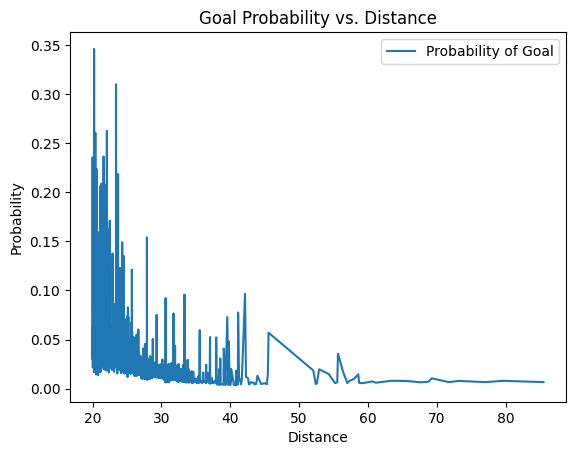

In [17]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(x_test['distance'])
sorted_distances = x_test['distance'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.title("Goal Probability vs. Distance")
plt.legend()
plt.show()


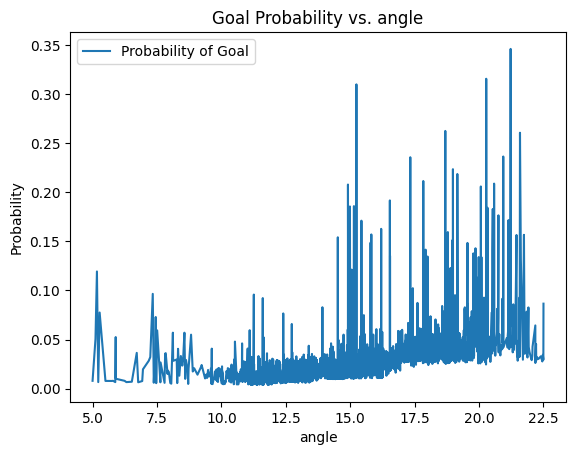

In [18]:
sorted_indices = np.argsort(x_test['angle'])
sorted_distances = x_test['angle'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("angle")
plt.ylabel("Probability")
plt.title("Goal Probability vs. angle")
plt.legend()
plt.show()

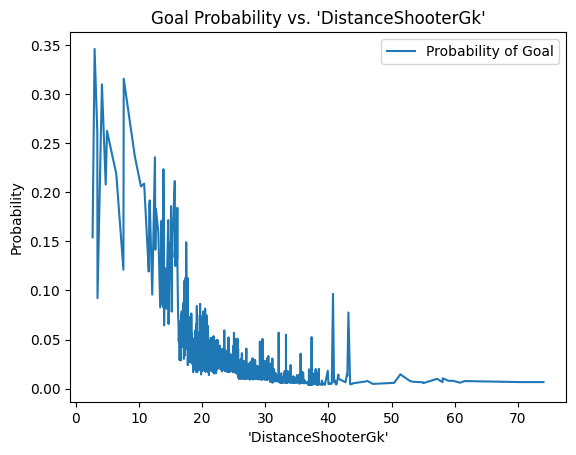

In [19]:
sorted_indices = np.argsort(x_test['DistanceShooterGk'])
sorted_distances = x_test['DistanceShooterGk'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("'DistanceShooterGk'")
plt.ylabel("Probability")
plt.title("Goal Probability vs. 'DistanceShooterGk'")
plt.legend()
plt.show()

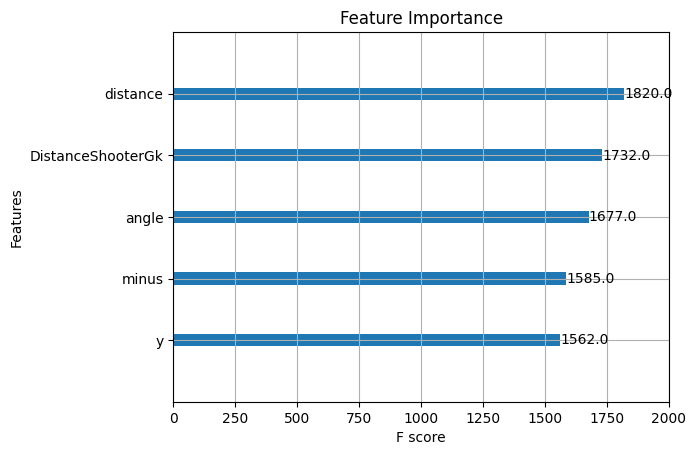

In [20]:
xgb.plot_importance(bst, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

In [21]:
bst.save_model('xG_foot_openplay_outside.json')